This file takes the data that was generated when running the physical experiments by creating csv files from the serial monitor. Beware that some cells don't behave as expected depending on which data file is chosen, explained in the comments below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from numpy import sin, cos, pi, sign

%matplotlib notebook

In [75]:
#Choose between the different csv files in the folder "states" for different plots
data = pd.read_csv("states/safety_pi_6.csv")

In [76]:
state_vector = data.to_numpy()

In [13]:
#This cell plots the execution time (if data is one of the time files)
plt.plot(state_vector/1000)
y = len(state_vector)*[4]
plt.plot(y, "--")
plt.ylabel("time (ms)")
plt.legend(["LQR time", "Time step"])
plt.yscale("log")
plt.show()

In [77]:
#If one of the "safety" files or "base" or "disturbance" is chosen then split the state_vector like this
theta_1     = state_vector[:,0]
theta_1_dot = state_vector[:,1]
theta_2     = state_vector[:,2]
theta_2_dot = state_vector[:,3]

In [78]:
#This is one example of adding the upper and lower bounds to the plot, and the reference line
#The numbers 1356, 2100 etc need to be adjusted for when the reference is shifted
#reference is only relevant for the "safety" files
length = len(theta_1)*6
reference = np.zeros(length)
reference[1356:] = -2.40
reference[2100:] = 0
reference[2406:] = 2.40
reference[3072:] = 0
upper = np.ones(length)*pi/6
lower = -np.ones(length)*pi/6

<IPython.core.display.Javascript object>


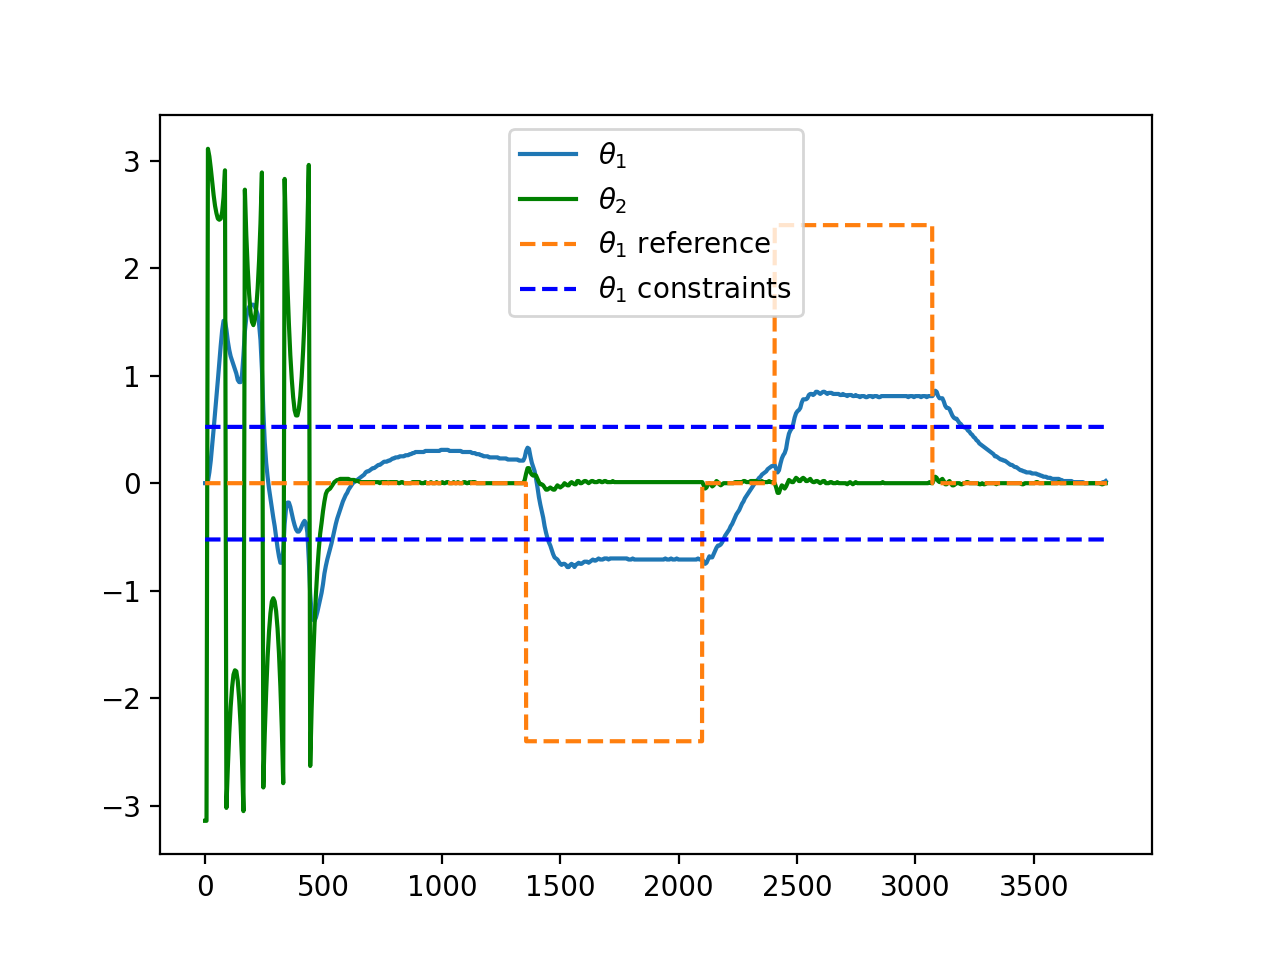

In [80]:
x = np.arange(len(theta_1)) * 6
plt.plot(x,theta_1)
plt.plot(x,theta_2, color='g')
plt.plot(reference, "--")

#Following lines are commented out for LQR since there is no upper or lower constraint
#and the velocities are not plotted for the safety plots

plt.plot(upper, "--", color = 'b')
plt.plot(lower, "--", color = 'b')
#plt.plot(x,theta_1_dot, color='orange')
#plt.plot(x,theta_2_dot, color='r')
#plt.legend(["$\\theta_1$", "$\\dot{\\theta}_1$", "$\\theta_2$" , "$\\dot{\\theta}_2$"])
plt.legend(["$\\theta_1$", "$\\theta_2$", "$\\theta_1$ reference", "$\\theta_1$ constraints"],loc="upper center")
plt.show()

In [234]:
#This cell makes two plots as subplots
"""""
x = np.arange(len(theta_1)) * 3
x = x[200:]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns

# First subplot: all 4 variables
axs[0].plot(x, theta_1[200:])
axs[0].plot(x, theta_2[200:], color='g')
axs[0].plot(x, theta_1_dot[200:], color='orange')
axs[0].plot(x, theta_2_dot[200:], color='r')
axs[0].legend(["$\\theta_1$", "$\\theta_2$", "$\\dot{\\theta}_1$", "$\\dot{\\theta}_2$"])

# Second subplot: just theta_2
axs[1].plot(x, theta_2[200:], color='g')
axs[1].legend(["$\\theta_2$"])

plt.tight_layout()
plt.show()
"""""

'""\nx = np.arange(len(theta_1)) * 3\nx = x[200:]\n\nfig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1 row, 2 columns\n\n# First subplot: all 4 variables\naxs[0].plot(x, theta_1[200:])\naxs[0].plot(x, theta_2[200:], color=\'g\')\naxs[0].plot(x, theta_1_dot[200:], color=\'orange\')\naxs[0].plot(x, theta_2_dot[200:], color=\'r\')\naxs[0].legend(["$\\theta_1$", "$\\theta_2$", "$\\dot{\\theta}_1$", "$\\dot{\\theta}_2$"])\n\n# Second subplot: just theta_2\naxs[1].plot(x, theta_2[200:], color=\'g\')\naxs[1].legend(["$\\theta_2$"])\n\nplt.tight_layout()\nplt.show()\n'